In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datasist as ds
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df= pd.read_csv('SolarPrediction.csv.crdownload')
df

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00
...,...,...,...,...,...,...,...,...,...,...,...
20554,1479186005,11/14/2016 12:00:00 AM,19:00:05,1.22,50,30.47,101,82.34,3.37,06:31:00,17:43:00
20555,1479185701,11/14/2016 12:00:00 AM,18:55:01,1.20,50,30.47,101,74.80,10.12,06:31:00,17:43:00
20556,1479185402,11/14/2016 12:00:00 AM,18:50:02,1.24,50,30.47,101,78.20,3.37,06:31:00,17:43:00
20557,1479185102,11/14/2016 12:00:00 AM,18:45:02,1.23,51,30.46,101,55.52,3.37,06:31:00,17:43:00


In [3]:
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                1
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20559 entries, 0 to 20558
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                20559 non-null  int64  
 1   Data                    20559 non-null  object 
 2   Time                    20559 non-null  object 
 3   Radiation               20559 non-null  float64
 4   Temperature             20559 non-null  int64  
 5   Pressure                20559 non-null  float64
 6   Humidity                20559 non-null  int64  
 7   WindDirection(Degrees)  20559 non-null  float64
 8   Speed                   20559 non-null  float64
 9   TimeSunRise             20559 non-null  object 
 10  TimeSunSet              20558 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 1.7+ MB


In [5]:
df.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,2.055900e+04,20559.000000,20559.000000,20559.000000,20559.000000,20559.000000,20559.000000
mean,1.476373e+09,226.011867,52.203950,30.436303,78.103166,129.246025,6.082599
std,2.245277e+06,331.667594,5.942381,0.032431,24.848384,76.595785,3.080998
min,1.472724e+09,1.130000,38.000000,30.340000,8.000000,0.090000,0.000000
25%,1.474530e+09,1.230000,48.000000,30.410000,63.000000,71.690000,3.370000
50%,1.476194e+09,3.140000,51.000000,30.440000,88.000000,134.480000,5.620000
75%,1.477748e+09,399.335000,56.000000,30.460000,99.000000,169.470000,7.870000
max,1.480482e+09,1601.260000,71.000000,30.540000,103.000000,359.950000,27.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UNIXTime', ylabel='Density'>

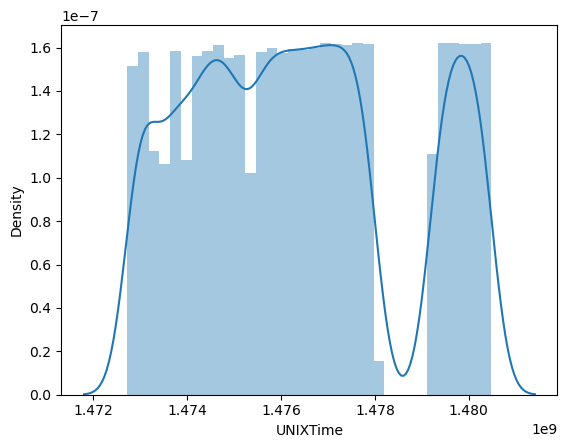

In [6]:
sns.distplot(df['UNIXTime'])

In [7]:
df=df.drop(['Data','Time','TimeSunRise','TimeSunSet'],axis=1)
df

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1475229326,1.21,48,30.46,59,177.39,5.62
1,1475229023,1.21,48,30.46,58,176.78,3.37
2,1475228726,1.23,48,30.46,57,158.75,3.37
3,1475228421,1.21,48,30.46,60,137.71,3.37
4,1475228124,1.17,48,30.46,62,104.95,5.62
...,...,...,...,...,...,...,...
20554,1479186005,1.22,50,30.47,101,82.34,3.37
20555,1479185701,1.20,50,30.47,101,74.80,10.12
20556,1479185402,1.24,50,30.47,101,78.20,3.37
20557,1479185102,1.23,51,30.46,101,55.52,3.37


<AxesSubplot:>

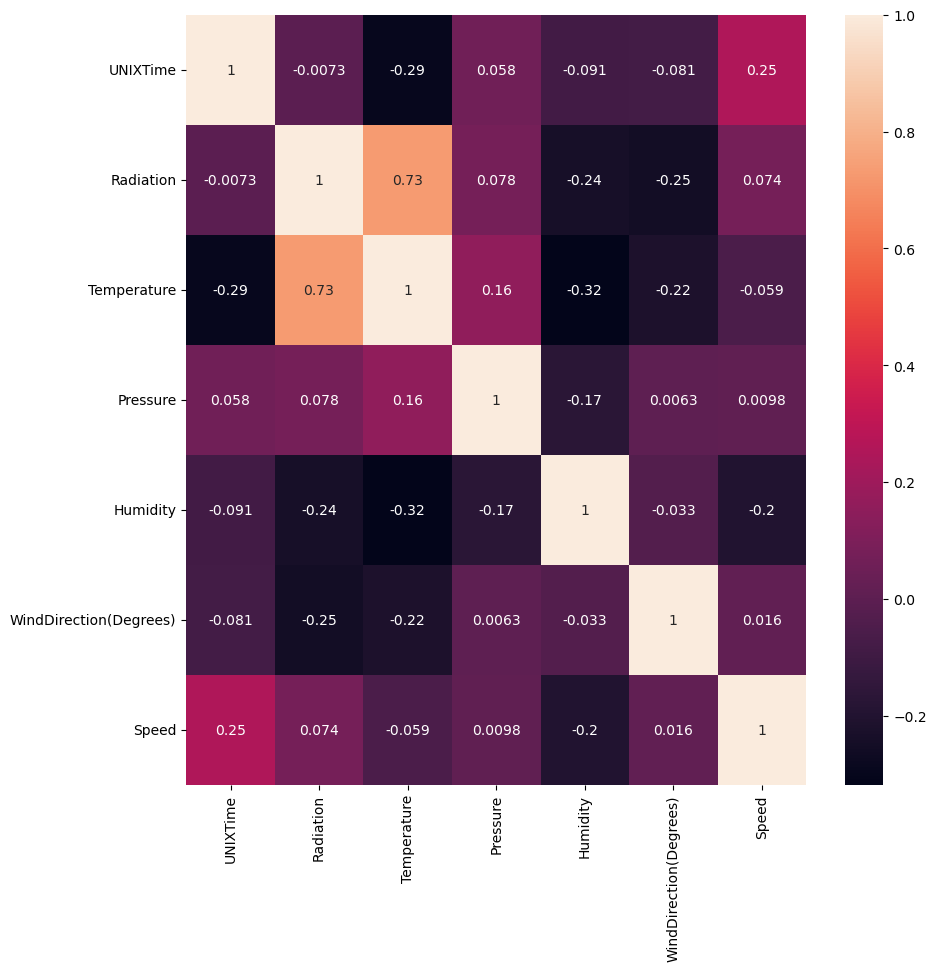

In [8]:
figure= plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [9]:
df.columns

Index(['UNIXTime', 'Radiation', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed'],
      dtype='object')

In [10]:
x = df[['UNIXTime','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed']]
y = df['Radiation']

# setting up testing and training sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [11]:
from sklearn.ensemble import RandomForestRegressor
Model = RandomForestRegressor()
Model.fit(x_train, y_train)

RandomForestRegressor()

In [12]:
Model.predict([[1475229326,48,30.46,59,177.39,5.62]])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1.5922])

In [13]:
# pickle--> to save the model to one file
import pickle as pk
filename="s_model.sav"
pk.dump(Model,open(filename,"wb"))#to dump the model into the file

In [14]:
Model

RandomForestRegressor()

In [15]:
!pip install gradio

Defaulting to user installation because normal site-packages is not writeable


In [16]:
import gradio as gr
def predict(UnixTime,Temperature,Pressure,Humidity,WindDirection,Speed):
    features=[UnixTime,Temperature,Pressure,Humidity,WindDirection,Speed]
    if len(features) != 6:
        return "Input must contain 7 values."
    x = np.array(features).reshape(1, -1)  # Reshape to have 1 row and 7 columns
    res = Model.predict(x)
    return res[0]

# Create a Gradio interface with 6 input fields
app = gr.Interface(
    fn=predict,
    inputs=[
#         gr.inputs.Slider(0,20000,label="UnixTime"),
        gr.Number(label="UnixTime"),
        gr.Number(label="Temperature (in degrees Celsius)"),
        gr.Number(label="Pressure"),
        gr.Number(label="Humidity"),
        gr.Number(label="WindDirection(Degrees)"),
        gr.Number(label="Speed"),
    ],
    outputs=gr.Textbox(label="Radiation"),
    title="Ice Cream Sales Prediction",
    description="Enter the inputs to predict ice cream sales.",
)

# Launch the Gradio app
app.launch(share=True)

Running on local URL:  http://127.0.0.1:7860

Thanks for being a Gradio user! If you have questions or feedback, please join our Discord server and chat with us: https://discord.gg/feTf9x3ZSB

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
